In [1]:
import os
import sys
import numpy as np
import pandas as pd
from preprocess_toptagging import *

In [2]:
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams['text.usetex'] = True

In this notebook I will demonstrate how to use the jet preprocessing code to convert the top jets from the top tagging challenge (https://arxiv.org/pdf/1902.09914.pdf) into the Lund plane representation.

Useful reference for the Lund jet plane: https://arxiv.org/pdf/1807.04758.pdf

First I cluster the jets using the parameters used to define the jets.  This is just so that, if we wanted to, we could do some cross-checks etc, but it is not a required step.  It is required when we are looking at di-jet event data.

In [3]:
h5path = "toptagging_train_short.h5"

In [4]:
R=0.8
p=-1
jets = cluster_toptagging_dataset_part( h5path, R, p, [0,10000] )

In [5]:
qcd_jets = jets['qcd']
top_jets = jets['top']

I now use the functions below to get the Lund representation for each jet.  This re-clusters the jets with C/A and then extracts the observables at each splitting.

In [6]:
R=1.0
p=0
qcd_lund_jets = []
for jet in qcd_jets:
    lund_jet = get_lund_history( jet, R, p )
    lund_splittings = get_lund_splittings( lund_jet )
    qcd_lund_jets.append( lund_splittings )
top_lund_jets = []
for jet in top_jets:
    lund_jet = get_lund_history( jet, R, p )
    lund_splittings = get_lund_splittings( lund_jet )
    top_lund_jets.append( lund_splittings )

A jet has a variable number of splittings, but and each splitting contains exactly 10 numbers.  These are:

plane-id, $p_T$ of the subjet splitting, mass of the subjet splitting, mass drop, ratio of decay products in the splitting, $\Delta R$, $\log 1/\Delta R$, $\log k_T$, $z$, $\kappa$.

In [7]:
print( len(top_lund_jets[0][0]) )
print( top_lund_jets[0][0] )

10
[0, 648.2849126684137, 82.87828992592193, 0.771504056079004, 0.009735700644718438, 0.6619703825748475, 0.4125344633588809, 1.884233510445205, 0.01528737253030829, 0.010119787842452394]


In [8]:
qcd_lund_jets = np.array( qcd_lund_jets, dtype=object )
top_lund_jets = np.array( top_lund_jets, dtype=object )

In [9]:
np.save( "qcd_lund_jets.npy", qcd_lund_jets )
np.save( "top_lund_jets.npy", top_lund_jets )

In [10]:
qcd_lund_jets = np.load( "qcd_lund_jets.npy", allow_pickle=True )
top_lund_jets = np.load( "top_lund_jets.npy", allow_pickle=True )

Now I want to separate the data into separate planes:

In [11]:
def get_plane( lund_jet_sample, plane_id):
    return [ [ [i[6],i[7]] for i in jet if i[0]==plane_id ] for jet in lund_jet_sample ]

qcd_lund_0 = get_plane( qcd_lund_jets, 0)
qcd_lund_1 = get_plane( qcd_lund_jets, 1)
qcd_lund_2 = get_plane( qcd_lund_jets, 2)
qcd_lund_3 = get_plane( qcd_lund_jets, 3)

top_lund_0 = get_plane( top_lund_jets, 0)
top_lund_1 = get_plane( top_lund_jets, 1)
top_lund_2 = get_plane( top_lund_jets, 2)
top_lund_3 = get_plane( top_lund_jets, 3)

And then flatten the arrays so that we can look at the different densities for QCD vs top:

In [12]:
def flatten( lund_jet_sample ):
    jf = []
    for jet in lund_jet_sample:
        jf += jet
    return jf

qcd_lund_0_flat = flatten( qcd_lund_0 )
qcd_lund_1_flat = flatten( qcd_lund_1 )
qcd_lund_2_flat = flatten( qcd_lund_2 )
qcd_lund_3_flat = flatten( qcd_lund_3 )

top_lund_0_flat = flatten( top_lund_0 )
top_lund_1_flat = flatten( top_lund_1 )
top_lund_2_flat = flatten( top_lund_2 )
top_lund_3_flat = flatten( top_lund_3 )

And then plot:

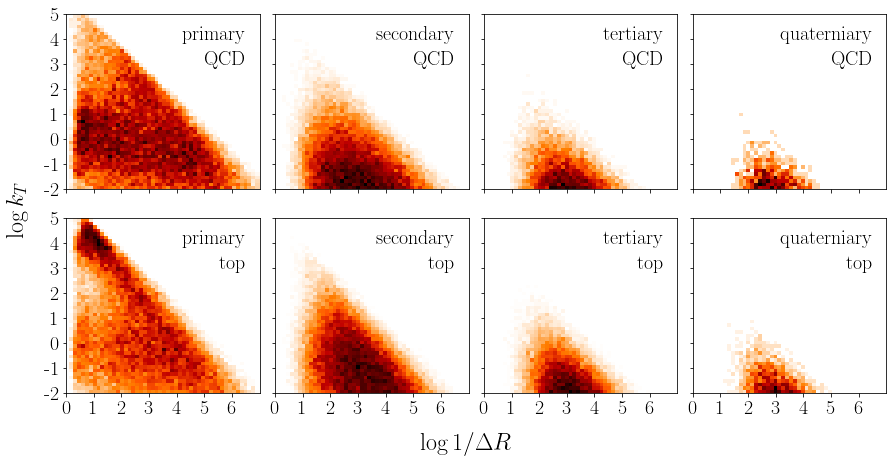

In [40]:
fig,axs = plt.subplots(2,4,figsize=(12,6))
bins = (50,50)
rnge = ((0,7),(-2,5))
cmap = 'gist_heat_r'

xt = [ i for i in range(rnge[0][0],rnge[0][1],1) ]
yt = [ i for i in range(rnge[1][0],rnge[1][1]+1,1) ]

labelfont = FontProperties()
labelfont.set_family('serif')
labelfont.set_name('Times New Roman')
labelfont.set_size(20)

axislabelfont = FontProperties()
axislabelfont.set_family('serif')
axislabelfont.set_name('Times New Roman')
axislabelfont.set_size(24)

tickfont = FontProperties()
tickfont.set_family('serif')
tickfont.set_name('Times New Roman')
tickfont.set_size(20)

def get_x( arr ):
    return [ i[0] for i in arr ]
def get_y( arr ):
    return [ i[1] for i in arr ]

axisfontsize = 18
labelfontsize = 18
axs[0,0].hist2d( get_x( qcd_lund_0_flat ), get_y( qcd_lund_0_flat ), bins=bins, range=rnge, cmap=cmap )
axs[0,1].hist2d( get_x( qcd_lund_1_flat ), get_y( qcd_lund_1_flat ), bins=bins, range=rnge, cmap=cmap )
axs[0,2].hist2d( get_x( qcd_lund_2_flat ), get_y( qcd_lund_2_flat ), bins=bins, range=rnge, cmap=cmap )
axs[0,3].hist2d( get_x( qcd_lund_3_flat ), get_y( qcd_lund_3_flat ), bins=bins, range=rnge, cmap=cmap )
axs[1,0].hist2d( get_x( top_lund_0_flat ), get_y( top_lund_0_flat ), bins=bins, range=rnge, cmap=cmap )
axs[1,1].hist2d( get_x( top_lund_1_flat ), get_y( top_lund_1_flat ), bins=bins, range=rnge, cmap=cmap )
axs[1,2].hist2d( get_x( top_lund_2_flat ), get_y( top_lund_2_flat ), bins=bins, range=rnge, cmap=cmap )
axs[1,3].hist2d( get_x( top_lund_3_flat ), get_y( top_lund_3_flat ), bins=bins, range=rnge, cmap=cmap )
axs[0,0].text( 6.5, 4.5,  "primary", va='top', ha='right', fontproperties=labelfont )
axs[0,1].text( 6.5, 4.5,  "secondary", va='top', ha='right', fontproperties=labelfont )
axs[0,2].text( 6.5, 4.5,  "tertiary", va='top', ha='right', fontproperties=labelfont )
axs[0,3].text( 6.5, 4.5,  "quaterniary", va='top', ha='right', fontproperties=labelfont )
axs[0,0].text( 6.5, 3.5,  "QCD", va='top', ha='right', fontproperties=labelfont )
axs[0,1].text( 6.5, 3.5,  "QCD", va='top', ha='right', fontproperties=labelfont )
axs[0,2].text( 6.5, 3.5,  "QCD", va='top', ha='right', fontproperties=labelfont )
axs[0,3].text( 6.5, 3.5,  "QCD", va='top', ha='right', fontproperties=labelfont )
axs[1,0].text( 6.5, 4.5,  "primary", va='top', ha='right', fontproperties=labelfont )
axs[1,1].text( 6.5, 4.5,  "secondary", va='top', ha='right', fontproperties=labelfont )
axs[1,2].text( 6.5, 4.5,  "tertiary", va='top', ha='right', fontproperties=labelfont )
axs[1,3].text( 6.5, 4.5,  "quaterniary", va='top', ha='right', fontproperties=labelfont )
axs[1,0].text( 6.5, 3.5,  "top", va='top', ha='right', fontproperties=labelfont )
axs[1,1].text( 6.5, 3.5,  "top", va='top', ha='right', fontproperties=labelfont )
axs[1,2].text( 6.5, 3.5,  "top", va='top', ha='right', fontproperties=labelfont )
axs[1,3].text( 6.5, 3.5,  "top", va='top', ha='right', fontproperties=labelfont )
axs[0,0].set_xticks( xt ) 
axs[0,1].set_xticks( xt ) 
axs[0,2].set_xticks( xt ) 
axs[0,3].set_xticks( xt ) 
axs[1,0].set_xticks( xt ) 
axs[1,1].set_xticks( xt ) 
axs[1,2].set_xticks( xt ) 
axs[1,3].set_xticks( xt )
axs[0,0].set_yticks( yt ) 
axs[0,1].set_yticks( yt ) 
axs[0,2].set_yticks( yt ) 
axs[0,3].set_yticks( yt ) 
axs[1,0].set_yticks( yt ) 
axs[1,1].set_yticks( yt ) 
axs[1,2].set_yticks( yt ) 
axs[1,3].set_yticks( yt ) 
axs[1,0].set_xticklabels( xt, fontproperties=tickfont )
axs[1,1].set_xticklabels( xt, fontproperties=tickfont )
axs[1,2].set_xticklabels( xt, fontproperties=tickfont )
axs[1,3].set_xticklabels( xt, fontproperties=tickfont )
axs[0,0].set_yticklabels( yt, fontproperties=tickfont )
axs[1,0].set_yticklabels( yt, fontproperties=tickfont )
axs[0,0].set_xticklabels([])
axs[0,1].set_xticklabels([])
axs[0,2].set_xticklabels([])
axs[0,3].set_xticklabels([])
axs[0,1].set_yticklabels([])
axs[0,2].set_yticklabels([])
axs[0,3].set_yticklabels([])
axs[1,1].set_yticklabels([])
axs[1,2].set_yticklabels([])
axs[1,3].set_yticklabels([])
fig.text( -0.03, 0.5, r'$\log k_T$', va='center', rotation='vertical', fontproperties=axislabelfont )
fig.text( 0.5, -0.05, r'$\log 1/\Delta R$', ha='center', fontproperties=axislabelfont )
fig.tight_layout()
fig.savefig("qcd_top_all_lund.pdf", bbox_inches = "tight")
#fig.show()

And then for single jets:

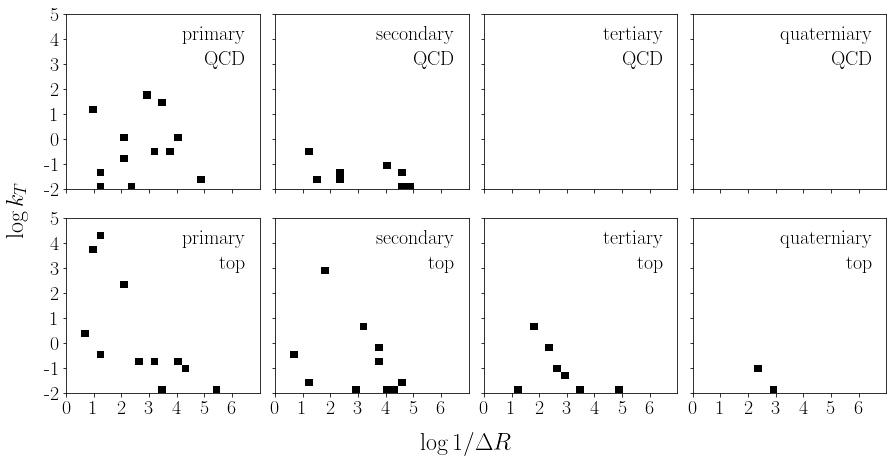

In [41]:
fig,axs = plt.subplots(2,4,figsize=(12,6))
bins = (25,25)
rnge = ((0,7),(-2,5))
cmap = 'gist_heat_r'

xt = range(rnge[0][0],rnge[0][1],1)
yt = range(rnge[1][0],rnge[1][1]+1,1)

labelfont = FontProperties()
labelfont.set_family('serif')
labelfont.set_name('Times New Roman')
labelfont.set_size(20)

axislabelfont = FontProperties()
axislabelfont.set_family('serif')
axislabelfont.set_name('Times New Roman')
axislabelfont.set_size(24)

tickfont = FontProperties()
tickfont.set_family('serif')
tickfont.set_name('Times New Roman')
tickfont.set_size(20)

eventi = 1

axisfontsize = 18
labelfontsize = 18
axs[0,0].hist2d( get_x( qcd_lund_0[eventi] ), get_y( qcd_lund_0[eventi] ), bins=bins, range=rnge, cmap=cmap )
axs[0,1].hist2d( get_x( qcd_lund_1[eventi] ), get_y( qcd_lund_1[eventi] ), bins=bins, range=rnge, cmap=cmap )
axs[0,2].hist2d( get_x( qcd_lund_2[eventi] ), get_y( qcd_lund_2[eventi] ), bins=bins, range=rnge, cmap=cmap )
axs[0,3].hist2d( get_x( qcd_lund_3[eventi] ), get_y( qcd_lund_3[eventi] ), bins=bins, range=rnge, cmap=cmap )
axs[1,0].hist2d( get_x( top_lund_0[eventi] ), get_y( top_lund_0[eventi] ), bins=bins, range=rnge, cmap=cmap )
axs[1,1].hist2d( get_x( top_lund_1[eventi] ), get_y( top_lund_1[eventi] ), bins=bins, range=rnge, cmap=cmap )
axs[1,2].hist2d( get_x( top_lund_2[eventi] ), get_y( top_lund_2[eventi] ), bins=bins, range=rnge, cmap=cmap )
axs[1,3].hist2d( get_x( top_lund_3[eventi] ), get_y( top_lund_3[eventi] ), bins=bins, range=rnge, cmap=cmap )
axs[0,0].text( 6.5, 4.5,  "primary", va='top', ha='right', fontproperties=labelfont )
axs[0,1].text( 6.5, 4.5,  "secondary", va='top', ha='right', fontproperties=labelfont )
axs[0,2].text( 6.5, 4.5,  "tertiary", va='top', ha='right', fontproperties=labelfont )
axs[0,3].text( 6.5, 4.5,  "quaterniary", va='top', ha='right', fontproperties=labelfont )
axs[0,0].text( 6.5, 3.5,  "QCD", va='top', ha='right', fontproperties=labelfont )
axs[0,1].text( 6.5, 3.5,  "QCD", va='top', ha='right', fontproperties=labelfont )
axs[0,2].text( 6.5, 3.5,  "QCD", va='top', ha='right', fontproperties=labelfont )
axs[0,3].text( 6.5, 3.5,  "QCD", va='top', ha='right', fontproperties=labelfont )
axs[1,0].text( 6.5, 4.5,  "primary", va='top', ha='right', fontproperties=labelfont )
axs[1,1].text( 6.5, 4.5,  "secondary", va='top', ha='right', fontproperties=labelfont )
axs[1,2].text( 6.5, 4.5,  "tertiary", va='top', ha='right', fontproperties=labelfont )
axs[1,3].text( 6.5, 4.5,  "quaterniary", va='top', ha='right', fontproperties=labelfont )
axs[1,0].text( 6.5, 3.5,  "top", va='top', ha='right', fontproperties=labelfont )
axs[1,1].text( 6.5, 3.5,  "top", va='top', ha='right', fontproperties=labelfont )
axs[1,2].text( 6.5, 3.5,  "top", va='top', ha='right', fontproperties=labelfont )
axs[1,3].text( 6.5, 3.5,  "top", va='top', ha='right', fontproperties=labelfont )
axs[0,0].set_xticks( xt ) 
axs[0,1].set_xticks( xt ) 
axs[0,2].set_xticks( xt ) 
axs[0,3].set_xticks( xt ) 
axs[1,0].set_xticks( xt ) 
axs[1,1].set_xticks( xt ) 
axs[1,2].set_xticks( xt ) 
axs[1,3].set_xticks( xt )
axs[0,0].set_yticks( yt ) 
axs[0,1].set_yticks( yt ) 
axs[0,2].set_yticks( yt ) 
axs[0,3].set_yticks( yt ) 
axs[1,0].set_yticks( yt ) 
axs[1,1].set_yticks( yt ) 
axs[1,2].set_yticks( yt ) 
axs[1,3].set_yticks( yt ) 
axs[1,0].set_xticklabels( xt, fontproperties=tickfont )
axs[1,1].set_xticklabels( xt, fontproperties=tickfont )
axs[1,2].set_xticklabels( xt, fontproperties=tickfont )
axs[1,3].set_xticklabels( xt, fontproperties=tickfont )
axs[0,0].set_yticklabels( yt, fontproperties=tickfont )
axs[1,0].set_yticklabels( yt, fontproperties=tickfont )
axs[0,0].set_xticklabels([])
axs[0,1].set_xticklabels([])
axs[0,2].set_xticklabels([])
axs[0,3].set_xticklabels([])
axs[0,1].set_yticklabels([])
axs[0,2].set_yticklabels([])
axs[0,3].set_yticklabels([])
axs[1,1].set_yticklabels([])
axs[1,2].set_yticklabels([])
axs[1,3].set_yticklabels([])
fig.text( -0.03, 0.5, r'$\log k_T$', va='center', rotation='vertical', fontproperties=axislabelfont )
fig.text( 0.5, -0.05, r'$\log 1/\Delta R$', ha='center', fontproperties=axislabelfont )
fig.tight_layout()
fig.savefig("qcd_top_single_lund.pdf", bbox_inches = "tight")
#fig.show()